# Jupyter 互動基礎篇

這裡介紹如何使用 Jupyter 互動模式, 並且把 Matplotlib 的動畫放入 Jupyter Notebook 中。

記得我們使用的是 Python 3!

## 1. 用 ipywidgets 互動

使用 `ipywidgets` 互動非常容易, 就是定一個函數, 然後用

* `interact`
* `interact_manual`

其中之一即可。這兩者有什麼區別? 讓我們繼續看下去...

In [23]:
from ipywidgets import interact, interact_manual

### 定一個準備互動的函數

我們舉一個簡單到不能再簡單的例子。這是 IPython (Jupyter) 原創者 Fernando Pérez 親自教我用的例子。

In [2]:
def f(x):
    print(x)

### 來互動!

In [29]:
interact(f, x=3);

3


這裡有兩個重點:

* 如果要的數值滑桿不是整數, 可以用 `interact(f, x=3.)`
* 指令最後的分號, 讓你第一次使用前不會出現討厭的字。

### 設範圍也可以

In [3]:
interact(f, x=(-3,10));

10


In [4]:
interact(f, x="你好");

Hello


In [5]:
interact(f, x={"政大":119, "台大":112, "成大":116});

112


In [6]:
interact(f, x=["Python", "Jupyter", "Matplotlib"]);

Jupyter


### [實戰練習]

我們來做一個 GUI 式的滙率換算程式。也就是輸入金額、選擇幣別, 然後按個「換算」鈕就換算台幣。

注意兩件事:

* 因為互動的特性, 我們也許要把函數、變數設成中文。好在這是 Python 3 的專長之一!
* 記得要用 `interact_manual`。

In [7]:
def 換算(金額,幣別):
    total = int(int(金額)*幣別)
    print("換算台幣為: " + str(total) + " 元。")

In [8]:
interact_manual(換算, 金額="請輸入金額", 幣別={"美金":32.1017, "日幣":0.3054, 
                                    "人民幣":4.8102});

換算台幣為: 305 元。


## 2. 動畫之 Jupyter 篇

從前從前, 有位美國的中學數學老師, 想到一個很棒的題目: 他每天在某個座標軸上點幾個點, 然後要同學回家找個函數, 通過的點越多, 分數就越高! 這樣的問題, 大大提昇同學對函數的興趣, 老師也很得意想出這麼棒的問題 (事實上真的超棒! 這問題基本上就是應用數學最最根本問題)。

直到有一天...

### 準備畫圖的標準動作

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 隨便找 7 個點

我們隨便找七個點, 座標放入 `x0, y0` 當中。然後為畫函數做準備, [-0.5, 3.5] 區間中取 1000 個點。

In [10]:
x0 = np.linspace(0, 3.14, 7)
y0 = np.random.rand(7)
x = np.linspace(-0.5, 3.5, 1000)

### Fitting!

這聰明的同學用了

$$0.5 \sin(k\cdot x) + 0.5$$

之類的函數。當 $k$ 變大的時候...

In [11]:
def fitting(k):
    plt.xlim(-0.5, 3.5)
    plt.ylim(0, 1)
    plt.scatter(x0,y0,s=60,c='r')
    plt.plot(x, 0.5*np.sin(k*x)+0.5,lw=2)

### 試試用 Jupyter 的 interact

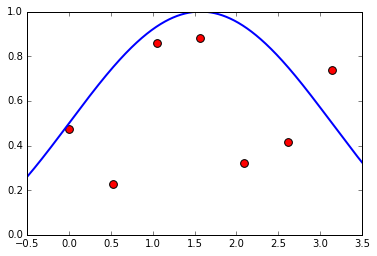

In [12]:
interact(fitting, k=(1,100));

是不是有點頓頓的? Jupyter 的好處是很快可以做出互動、但像畫圖這樣的有點辛苦。所以我們想用 Matplotlib 的動畫。

## 3. Matplotlib 的動畫

我們把剛剛的動畫用 Matplotlib 做出來, 現在 (Matplotlib 1.5 之後) 可以直接秀在 Jupyter 上, 只是要做一些設定。首先我們要用 `animation` 做, 嗯, animation。然後 `rc` 是用來改 Matplotlib 參數的。

In [13]:
from matplotlib import animation, rc

要下這個指令, 才能在 Jupyter 中看到結果。

In [14]:
rc('animation', html='html5')

### Step 1. 畫個背景

我們先畫個基本不動的部份。

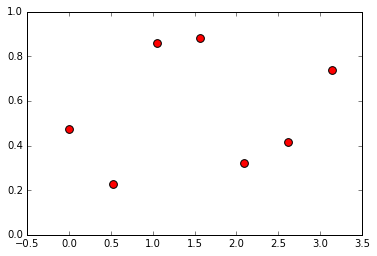

In [15]:
fig, ax = plt.subplots()
ax.set_xlim((-0.5,3.5))
ax.set_ylim((0, 1))
ax.scatter(x0,y0,s=60,c='r')
line, = ax.plot([], [], lw=2)

### Step 2. 清空函數

設個 initial function, 是要用來畫下一張時, 先清空原本資料用的。

In [16]:
def init():
    line.set_data([], [])
    return (line,)

### Step 3. 動畫函數

真的要動的函數, 基本上就是設個帶入不同整數就會變的函數。不確定效果可以用剛剛卡卡但方便的 Jupyter 風先測試一下。

In [28]:
def animate(k):
    y = 0.5*np.sin(k*x)+0.5
    line.set_data(x, y)
    return (line,)

### 動畫就這樣設!

In [18]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

### 在 Jupyter 中秀出我們要的動畫!

In [19]:
anim

In [20]:
print(animation.writers.list())

['ffmpeg_file', 'ffmpeg', 'imagemagick', 'imagemagick_file']
